# **Modeling Data Using a Graph.**

In this example we explore using NetworkX to build graphs based on related data. Below are some examples that illustrate how to build a graph using this package. 

Run these examples and confirm that you have NetworkX correctly installed. Then complete questions 1 - 4 below. 

It is recommended that you upload and run this notebook on [Colab](https://colab.research.google.com/)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

In [3]:
# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

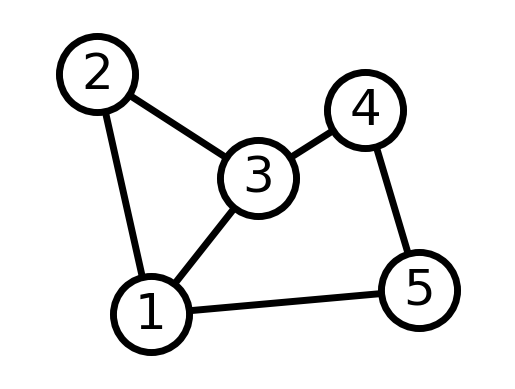

In [4]:
nx.draw_networkx(G, pos, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# Now try building a directed Graph 

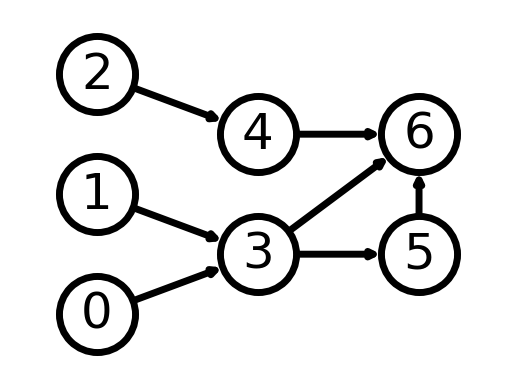

In [5]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

**Modeling Twitter Network.**

In this exercise we will model and analyze example Twitter social network data. Assume we have information about a small network of Twitter users -- specifically who each user "follows". Thus we are modeling the "follows" relation using a graph. 

Using the following data table below complete the stated questions.


- Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei
- Wei follows Dan, Bob, and Sam
- Bob follows Jane, Wei, and Tiana
- Tiana follows Jane and Juan
- Sally follows Bob
- Jane follows Jane and Wei
- Juan follows Sally and Jane 
- Sam follows Jane 

NOTE: If you have any questions about syntax or function names, search the docs. There is a search bar in the upper right of this page:

https://networkx.org/documentation/stable/reference/index.html

## Question 1.

Would you use a undirected graph or a directed graph to model this data? Explain.

I would use a directed graph. User A following user B connotes A moving toward the B, which may be symbolized using an arrow. A follows B, but B may but does not necessarily follow A. A relationship / edge is asymmetric, one way, and directed. An undirected relationship would suggest a bidirectional relationship, which might sometimes be true but isn't necessarily true. Any bidirectional relationship should be illustrated as such, instead of as an undirected relationship. The number of users A follows is the out degree of A in a directed graph. The number of users that follow A is the in degree of A in a directed graph. Tweets travel from users that A follows to A.

## Question 2.

Create this graph using NetworkX and plot the resulting graph. 

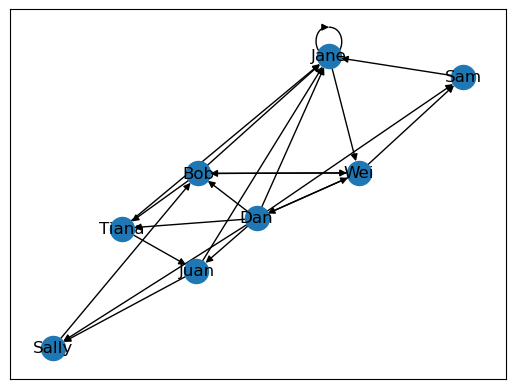

In [6]:
list_of_edges = [
    ("Dan", "Jane"), ("Dan", "Bob"), ("Dan", "Sally"), ("Dan", "Sam"), ("Dan", "Tiana"), ("Dan", "Juan"), ("Dan", "Wei"),
    ("Wei", "Dan"), ("Wei", "Bob"), ("Wei", "Sam"),
    ("Bob", "Jane"), ("Bob", "Wei"), ("Bob", "Tiana"),
    ("Tiana", "Jane"), ("Tiana", "Juan"),
    ("Sally", "Bob"),
    ("Jane", "Jane"), ("Jane", "Wei"),
    ("Juan", "Sally"), ("Juan", "Jane"),
    ("Sam", "Jane")
]

directed_graph = nx.DiGraph(list_of_edges)

nx.draw_networkx(directed_graph)

## Question 3.

Assume you wanted to determine which user was the biggest "social influencer". Which graph measure would you compute and why?

I would start by computing the in degree. Every incoming edge represents a relationship between a user of interest and a follower of that user. The more incoming edges a user has, the more followers and reach that user has. The Twitter influencer score depends on the number of followers. The in degree centrality of a user is ratio of the number of incoming edges / followers of that user to the number of other users.

I would also compute betweeness centrality. See below. While in degree may have the advantage of representing number of immediate followers / local popularity, betweeness centrality represents the centrality of a user to multiple groups and the degree to which information flows through the user and to which the user has leverage.

## Question 4.

Compute the measure chosen and determine who in this example was the biggest social influencer. See example below which analyzes facebook social network data. You will need to have data file facebook_combined.txt to complete this example.

Below are dictionaries of users, in degrees, and in degree centralities. Jane has the highest in degree and was the biggest social influencer.

In [7]:
dictionary_of_users_and_in_degrees = dict(directed_graph.in_degree())
print(dictionary_of_users_and_in_degrees)

{'Dan': 1, 'Jane': 6, 'Bob': 3, 'Sally': 2, 'Sam': 2, 'Tiana': 2, 'Juan': 2, 'Wei': 3}


In [8]:
dictionary_of_users_and_in_degree_centralities = nx.in_degree_centrality(directed_graph)
print(dictionary_of_users_and_in_degree_centralities)

{'Dan': 0.14285714285714285, 'Jane': 0.8571428571428571, 'Bob': 0.42857142857142855, 'Sally': 0.2857142857142857, 'Sam': 0.2857142857142857, 'Tiana': 0.2857142857142857, 'Juan': 0.2857142857142857, 'Wei': 0.42857142857142855}


In [9]:
# Read in graph data from facebook data txt file. 
G_fb = nx.read_edgelist("Module 4 - HW - Facebook Combined.txt", create_using = nx.Graph(), nodetype=int)
print(G_fb)

Graph with 4039 nodes and 88234 edges


(-0.7169714862108231,
 1.1047296220064162,
 -0.8698901605606079,
 1.17768187046051)

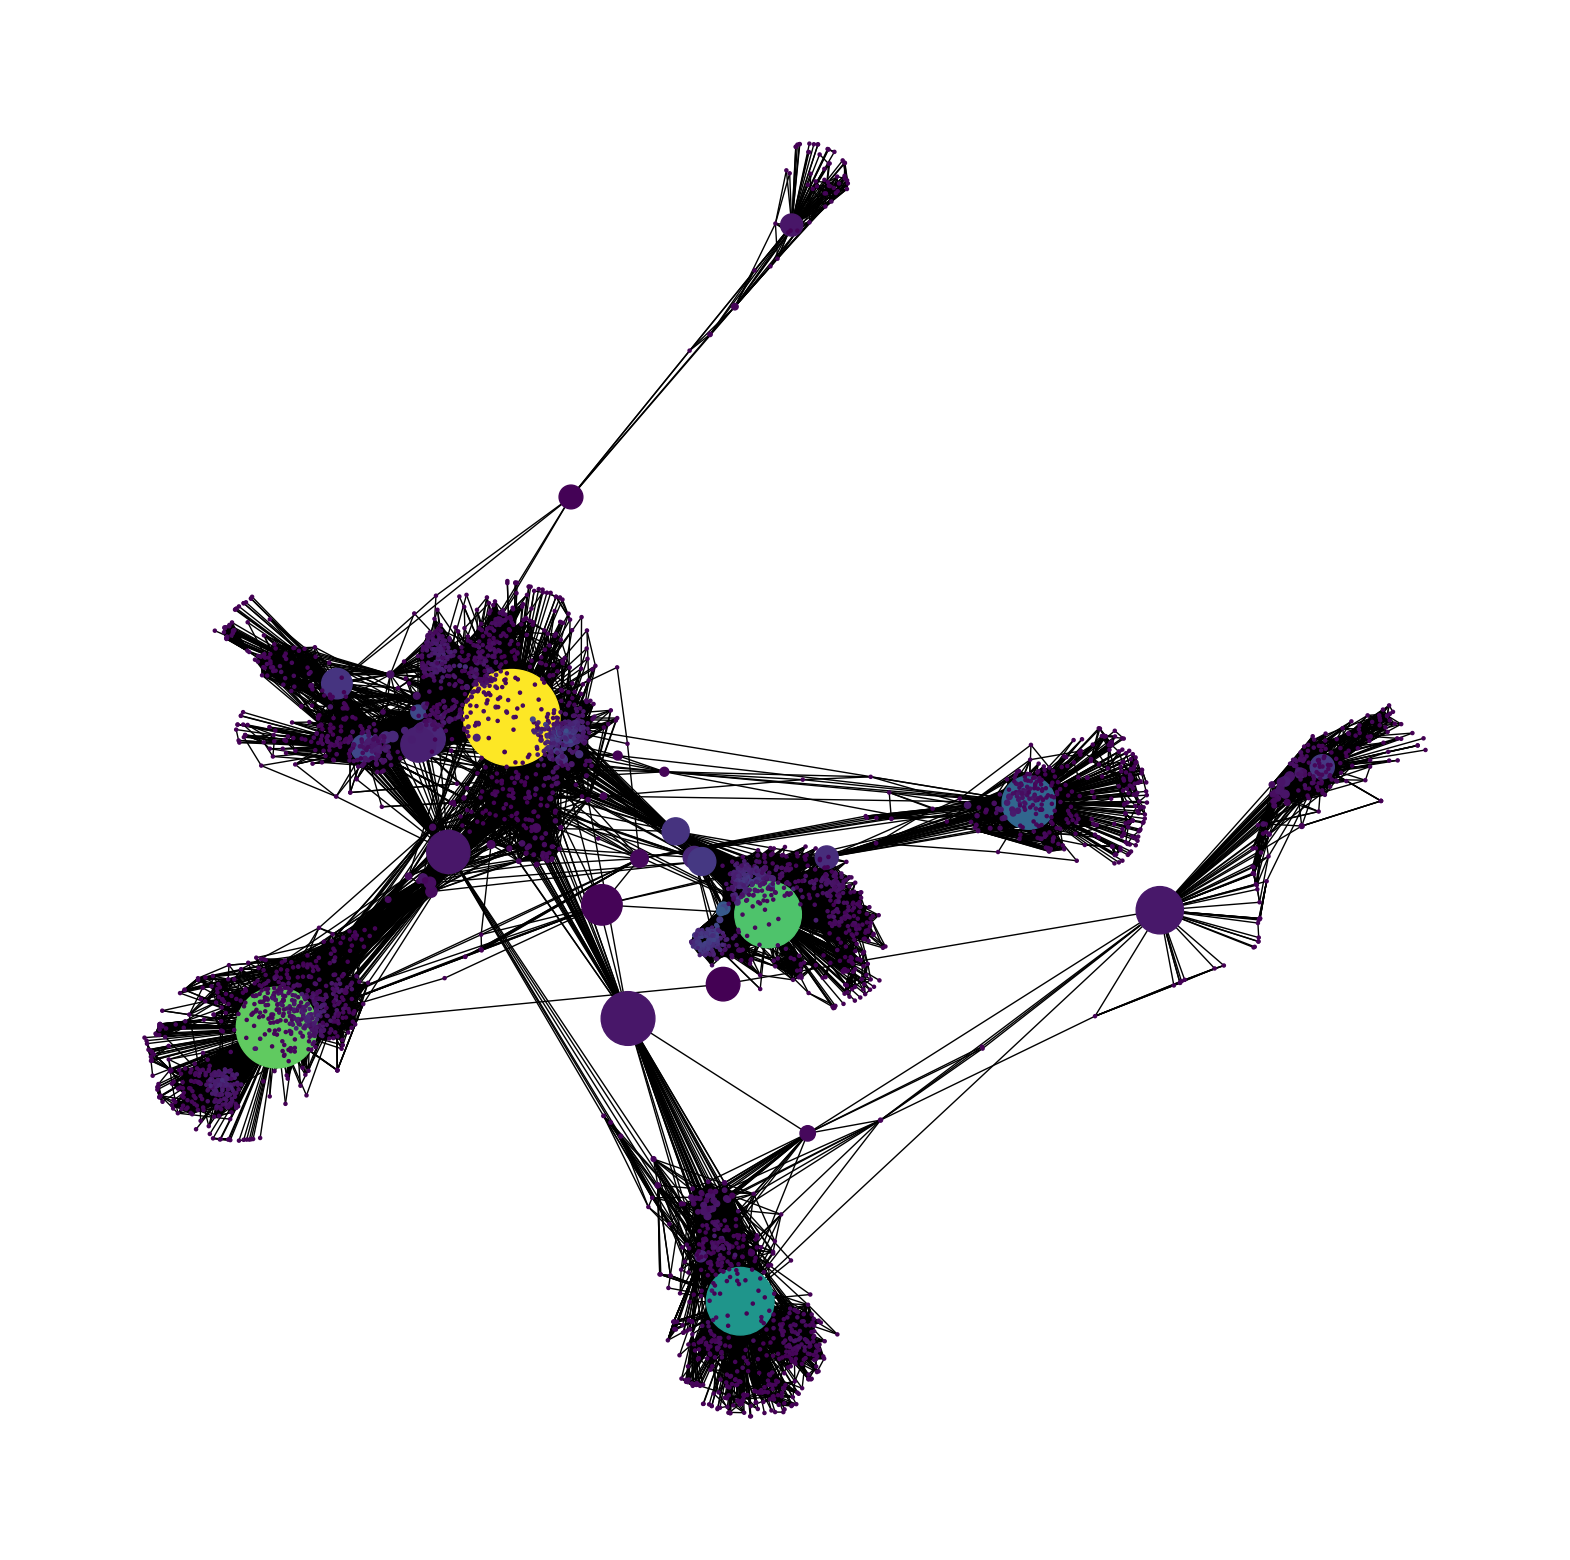

In [10]:
# Compute measures of centrality and degree for the nodes. These attributes can 
# be used to help analyze the graph. Then the graph is plotted and color and size
# of the nodes are used to indicate size and betweeness, respectively. (Note: This
# is a large data set and may take 5+ minutes to run.)

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

# Nodes with the highest betweeness

In [11]:
# Identify the top 5 nodes with highest betweeness measures. 
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

We adapt the example which analyzes facebook social network data to our graph. This example calculates each node's betweeness centrality, which is usually a measure of how often a node lies on the shortest path between two other nodes distinct from the node of interest and each other, though in this case betweeness centrality may depend on paths starting or ending at the node of interest. The color of a node depends on its total degree. The size of a node depends on its betweeness centrality. Wei, Jane, Bob, Dan, and Sally in order have the highest betweeness centralities and may be the greatest social influencer.

A user with a high betweeness centrality may exist on one or many "information highways" and act as a bridge between otherwise separate pockets of a graph. Such a user may facilitate information flow between those pockets, shape conversations, control what other users see, or drive trends. Deleting such a user would disrupt information flow in the graph.

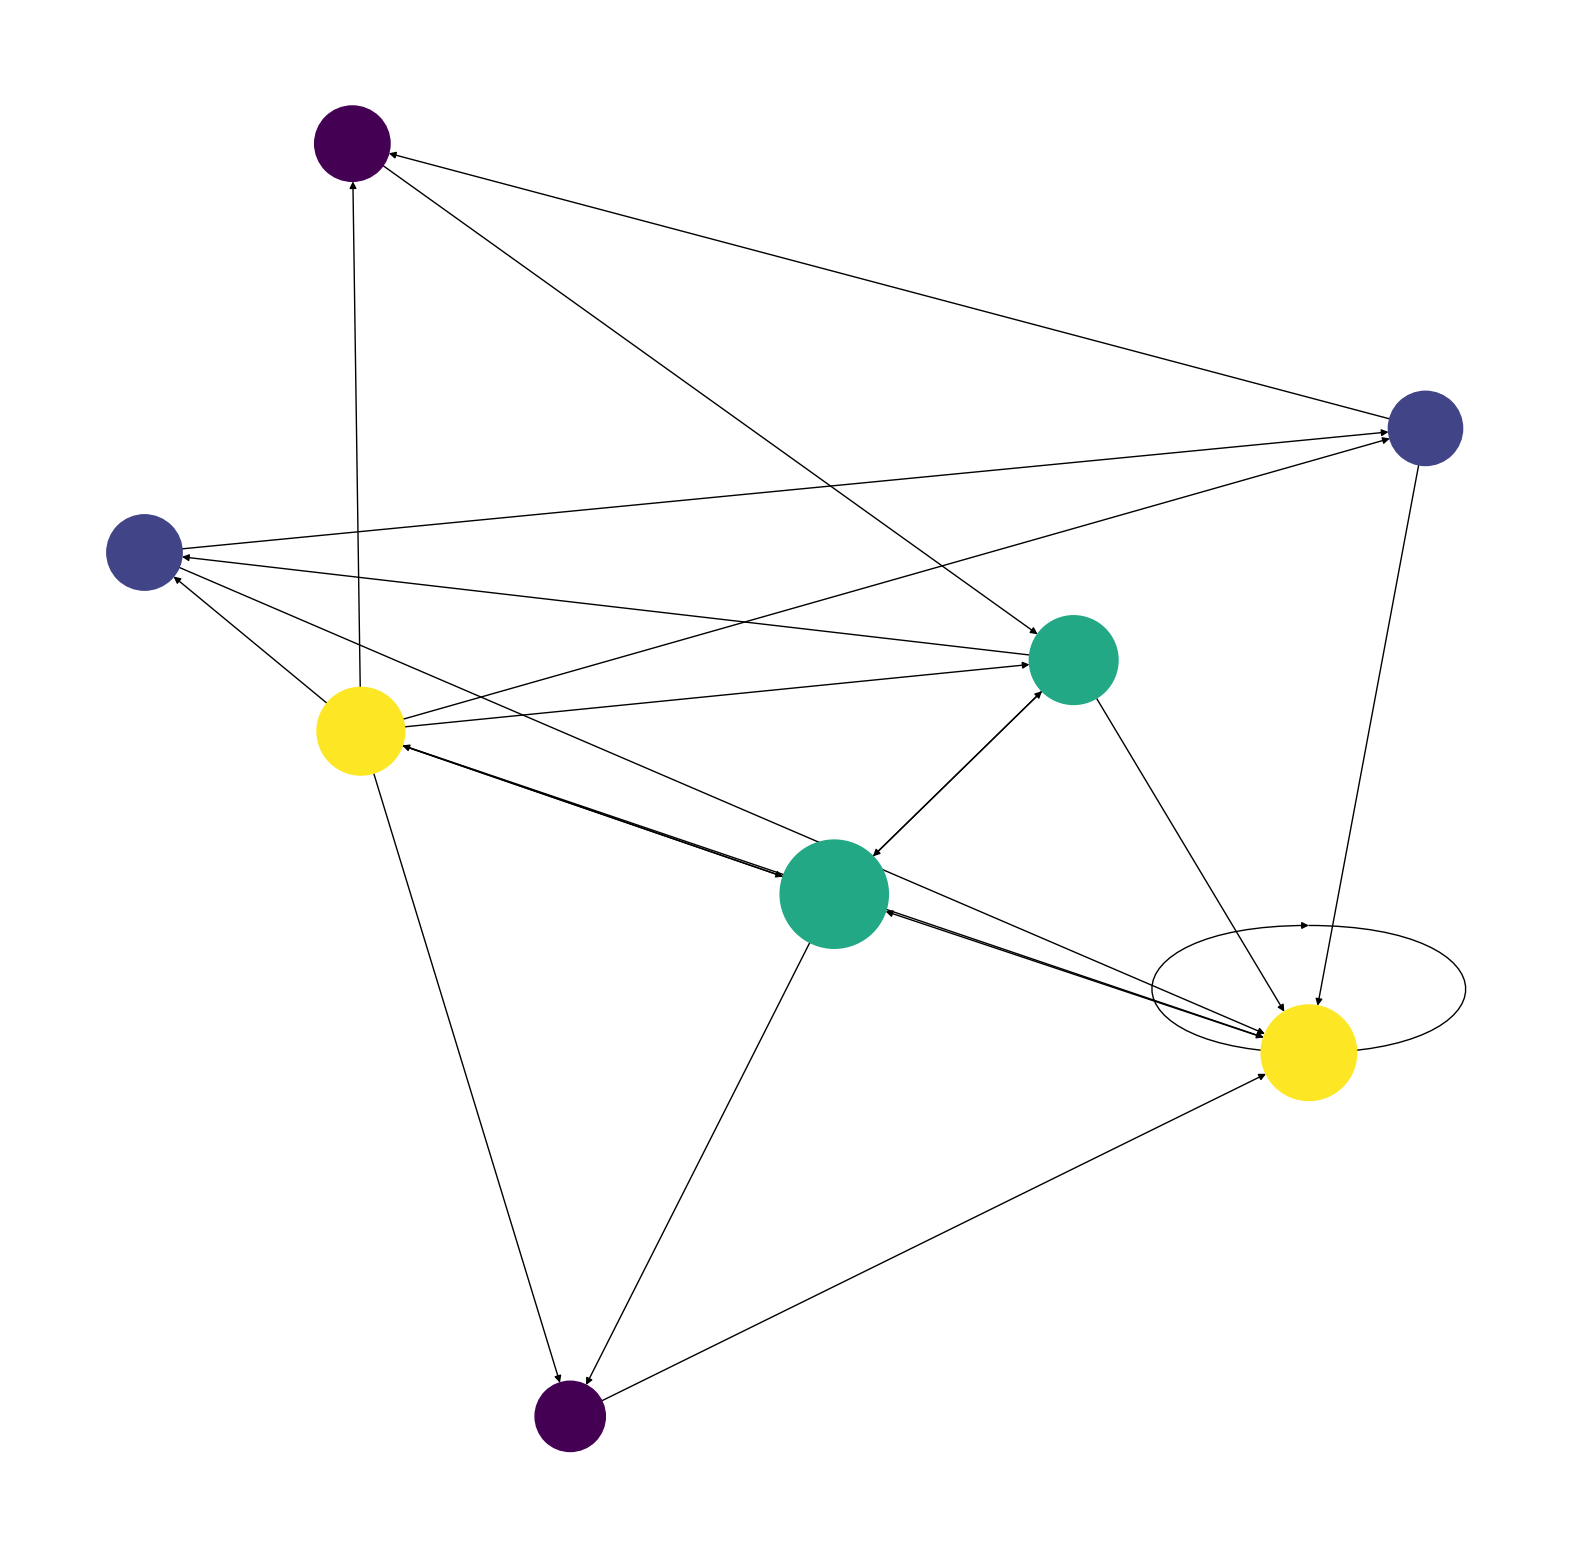

In [12]:
# Compute measures of centrality and degree for the nodes. These attributes can 
# be used to help analyze the graph. Then the graph is plotted and color and size
# of the nodes are used to indicate size and betweeness, respectively. (Note: This
# is a large data set and may take 5+ minutes to run.)

pos = nx.spring_layout(directed_graph)
betCent = nx.betweenness_centrality(directed_graph, normalized=True, endpoints=True)
node_color = [20000.0 * directed_graph.degree(v) for v in directed_graph]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(directed_graph, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')
plt.savefig("graph.png")

In [13]:
# Identify the top 5 nodes with highest betweeness measures. 
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Wei', 'Jane', 'Bob', 'Dan', 'Sally']

We also adapt analyzing degree and degree centrality to the facebook social network. facebook differs from Twitter in that facebook users generally are friends with undirected relationships between them. User 107 has the highest degree of 1045 and highest degree centrality of 0.259.

In [14]:
# Read in graph data from facebook data txt file. 
G_fb = nx.read_edgelist("Module 4 - HW - Facebook Combined.txt", create_using = nx.Graph(), nodetype=int)
print(G_fb)

Graph with 4039 nodes and 88234 edges


In [15]:
dictionary_of_users_and_degrees = dict(G_fb.degree())

In [16]:
dictionary_of_users_and_degree_centralities = nx.degree_centrality(G_fb)

In [17]:
import pandas as pd

df = (
    pd.DataFrame({
        "user": list(dictionary_of_users_and_degrees.keys()),
        "number of friends": list(dictionary_of_users_and_degrees.values()),
        "degree centrality": [round(dictionary_of_users_and_degree_centralities[user], 3) for user in dictionary_of_users_and_degrees]
    })
    .sort_values("number of friends", ascending = False)
    .reset_index(drop = True)
)

print(df)

      user  number of friends  degree centrality
0      107               1045              0.259
1     1684                792              0.196
2     1912                755              0.187
3     3437                547              0.135
4        0                347              0.086
...    ...                ...                ...
4034   602                  1              0.000
4035   585                  1              0.000
4036  3451                  1              0.000
4037  3856                  1              0.000
4038  2269                  1              0.000

[4039 rows x 3 columns]
